In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import joblib

random_state = 1117

In [42]:
try: # If you are running this notebook on your local machine
  # Put the path to your CSV file here
  file_name = "./Customerbehavior_Final.csv"
  df = pd.read_csv(file_name, index_col=0, low_memory=False)
except : # If you are running this notebook on Google Colab
  from google.colab import drive
  drive.mount('/content/drive')
  # Put the path to your CSV file here
  file_name = "./drive/MyDrive/Data-IA/Customerbehavior_Final.csv"
  df = pd.read_csv(file_name, index_col=0, low_memory=False)

df.shape

(3169996, 14)

In [43]:
df.head()

,StoreCode,BillCode,EnterTime,LeaveTime,BoxSize,MealType,OrderTime,MealSpending,BoxSpending,CustomerNumber,MaleNumber,FemaleNumber,Age,Membership
0,107,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Light Meal,2016-02-01 01:04:13,114,2857,6,3,3,30~39,0
1,107,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Project Package,2016-02-01 01:43:29,380,2857,6,3,3,30~39,0
2,107,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Beer,2016-02-01 02:17:11,280,2857,6,3,3,30~39,0
3,107,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Beverages (not including wine),2016-02-01 01:04:13,210,2857,6,3,3,30~39,0
4,107,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Fruit,2016-02-01 01:43:29,343,2857,6,3,3,30~39,0


# Data preparation

In [44]:
df.isnull().sum()

StoreCode         0
BillCode          0
EnterTime         0
LeaveTime         0
BoxSize           0
MealType          0
OrderTime         0
MealSpending      0
BoxSpending       0
CustomerNumber    0
MaleNumber        0
FemaleNumber      0
Age               0
Membership        0
dtype: int64

## Apply complete store name

In [45]:
def store_name(value):
    if value == 107: return 'SOGO Store'
    elif value == 108: return 'Tao Yuan'
    elif value == 112: return 'Jia yi'
    elif value == 113: return 'Kaohsiung'
    elif value == 114: return 'Zhong Hua Xin dian'
    else: return 'Lin Sheng'

print(df["StoreCode"].value_counts(dropna=False))

df["StoreCode"] = pd.to_numeric(df["StoreCode"], errors='coerce')
df['StoreName'] = df['StoreCode'].apply(store_name)

print(df["StoreCode"].value_counts(dropna=False))
print(df["StoreName"].value_counts(dropna=False))

StoreCode
114     708661
K01     593878
107     573672
108     456546
0114    299265
113     202004
0107    179701
112     156269
Name: count, dtype: int64
StoreCode
114.0    1007926
107.0     753373
NaN       593878
108.0     456546
113.0     202004
112.0     156269
Name: count, dtype: int64
StoreName
Zhong Hua Xin dian    1007926
SOGO Store             753373
Lin Sheng              593878
Tao Yuan               456546
Kaohsiung              202004
Jia yi                 156269
Name: count, dtype: int64


## Create UniqueID

In [46]:
# Create "UniqueID" columns by concatenating StoreCode and BillCode
df["UniqueID"] = df['BillCode'].astype(str) + df['StoreCode'].astype(str)
df.drop(['StoreCode'], axis=1, inplace=True)
df.head()

,BillCode,EnterTime,LeaveTime,BoxSize,MealType,OrderTime,MealSpending,BoxSpending,CustomerNumber,MaleNumber,FemaleNumber,Age,Membership,StoreName,UniqueID
0,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Light Meal,2016-02-01 01:04:13,114,2857,6,3,3,30~39,0,SOGO Store,1602010011107.0
1,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Project Package,2016-02-01 01:43:29,380,2857,6,3,3,30~39,0,SOGO Store,1602010011107.0
2,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Beer,2016-02-01 02:17:11,280,2857,6,3,3,30~39,0,SOGO Store,1602010011107.0
3,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Beverages (not including wine),2016-02-01 01:04:13,210,2857,6,3,3,30~39,0,SOGO Store,1602010011107.0
4,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Fruit,2016-02-01 01:43:29,343,2857,6,3,3,30~39,0,SOGO Store,1602010011107.0


## Change date string to date pandas object

In [47]:
# Create function to format the time stamp to date-time object
# def get_time(value):
#     temp = str.replace(value, "/", "-")
#     count1 = temp.count(":")
#     if count1 == 1: temp = temp + ":00"
#     return datetime.strptime(temp, "%Y-%m-%d %H:%M:%S")

# # Create new Time columns containing date-time object format
# df["TimeEnter"] = df["EnterTime"].apply(get_time)
# df["TimeLeave"] = df["LeaveTime"].apply(get_time)
# df["TimeOrder"] = df["OrderTime"].apply(get_time)

In [48]:
# The methods below are more efficient than 'apply' as they utilize pandas vectorized operations
# for string manipulation and datetime conversion,
# which are optimized for performance on entire columns.
df['EnterTime'] = df['EnterTime'].str.replace("/", "-").str.pad(19, side='right', fillchar='0')
df['LeaveTime'] = df['LeaveTime'].str.replace("/", "-").str.pad(19, side='right', fillchar='0')
df['OrderTime'] = df['OrderTime'].str.replace("/", "-").str.pad(19, side='right', fillchar='0')

df["EnterTime"] = pd.to_datetime(df["EnterTime"], format="%Y-%m-%d %H:%M:%S")
df["LeaveTime"] = pd.to_datetime(df["LeaveTime"], format="%Y-%m-%d %H:%M:%S")
df["OrderTime"] = pd.to_datetime(df["OrderTime"], format="%Y-%m-%d %H:%M:%S")

In [49]:
df["Duration(hours)"] = (df["LeaveTime"] - df["EnterTime"]) / np.timedelta64(1, 's') / 3600
df.head()

,BillCode,EnterTime,LeaveTime,BoxSize,MealType,OrderTime,MealSpending,BoxSpending,CustomerNumber,MaleNumber,FemaleNumber,Age,Membership,StoreName,UniqueID,Duration(hours)
0,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Light Meal,2016-02-01 01:04:13,114,2857,6,3,3,30~39,0,SOGO Store,1602010011107.0,5.2
1,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Project Package,2016-02-01 01:43:29,380,2857,6,3,3,30~39,0,SOGO Store,1602010011107.0,5.2
2,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Beer,2016-02-01 02:17:11,280,2857,6,3,3,30~39,0,SOGO Store,1602010011107.0,5.2
3,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Beverages (not including wine),2016-02-01 01:04:13,210,2857,6,3,3,30~39,0,SOGO Store,1602010011107.0,5.2
4,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Fruit,2016-02-01 01:43:29,343,2857,6,3,3,30~39,0,SOGO Store,1602010011107.0,5.2


## Caching

In [50]:
df.to_feather('./Customerbehavior_Final.feather')

In [51]:
df = pd.read_feather('./Customerbehavior_Final.feather')
df.head()

,BillCode,EnterTime,LeaveTime,BoxSize,MealType,OrderTime,MealSpending,BoxSpending,CustomerNumber,MaleNumber,FemaleNumber,Age,Membership,StoreName,UniqueID,Duration(hours)
0,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Light Meal,2016-02-01 01:04:13,114,2857,6,3,3,30~39,0,SOGO Store,1602010011107.0,5.2
1,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Project Package,2016-02-01 01:43:29,380,2857,6,3,3,30~39,0,SOGO Store,1602010011107.0,5.2
2,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Beer,2016-02-01 02:17:11,280,2857,6,3,3,30~39,0,SOGO Store,1602010011107.0,5.2
3,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Beverages (not including wine),2016-02-01 01:04:13,210,2857,6,3,3,30~39,0,SOGO Store,1602010011107.0,5.2
4,1602010011,2016-02-01 00:49:00,2016-02-01 06:01:00,Small box,Fruit,2016-02-01 01:43:29,343,2857,6,3,3,30~39,0,SOGO Store,1602010011107.0,5.2


# Plotting

In [52]:
df = pd.read_feather('./Customerbehavior_Final.feather')
unique_ages = df.groupby("UniqueID")["Age"].unique()
all_transactions_have_unique_age = all(unique_ages.apply(len) == 1)

if all_transactions_have_unique_age:
    print("Each transaction has a unique age.")
else:
    print("Some transactions have more than one age associated.")

# It's unusual that each transaction has a unique age, as this suggests there are no groups with significant age disparities.


Each transaction has a unique age.


## Transaction amout by Store

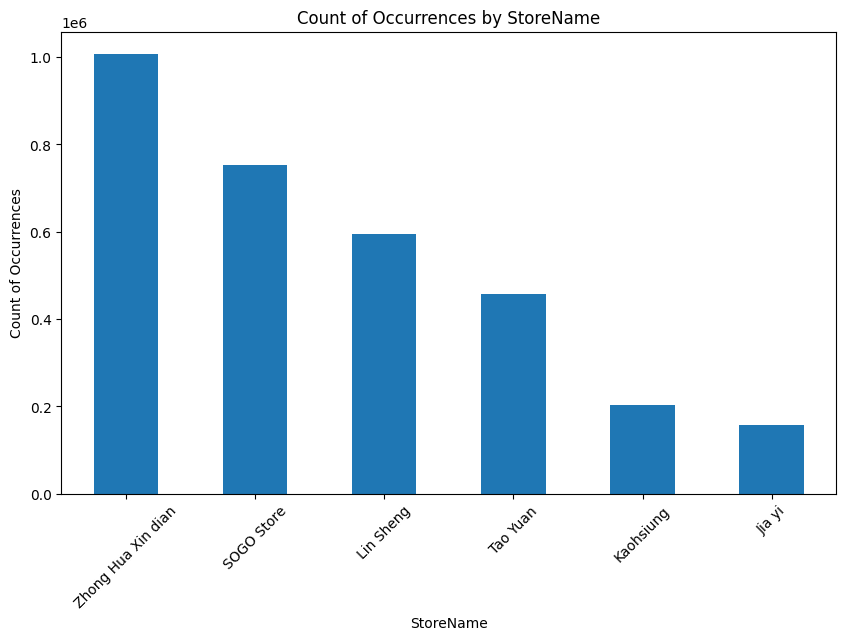

In [53]:
df = pd.read_feather('./Customerbehavior_Final.feather')

# Counting occurrences of each StoreName
store_counts = df['StoreName'].value_counts().sort_values(ascending=False)

# Generating the bar chart
plt.figure(figsize=(10,6))
store_counts.plot(kind='bar')
plt.title('Count of Occurrences by StoreName')
plt.xlabel('StoreName')
plt.ylabel('Count of Occurrences')
plt.xticks(rotation=45)
plt.show()

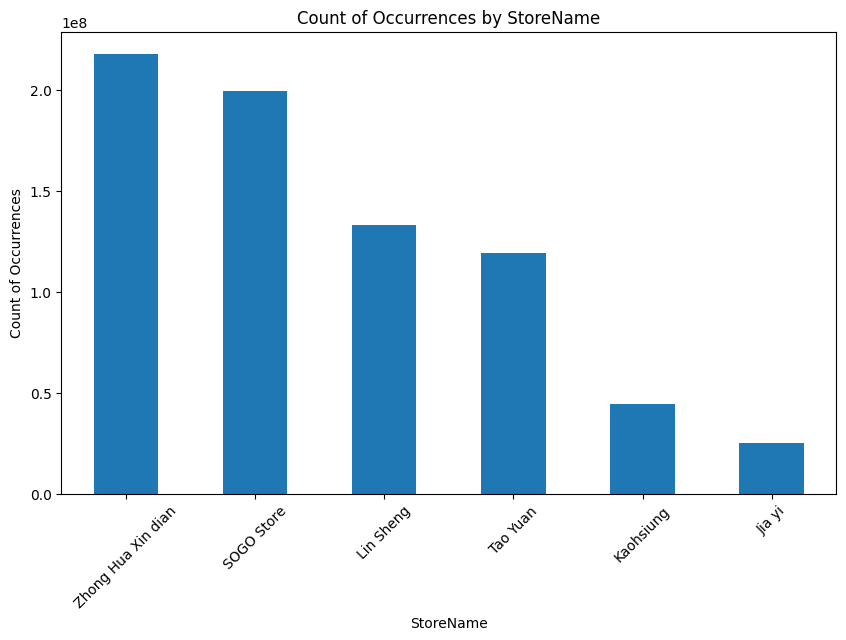

In [54]:
df = pd.read_feather('./Customerbehavior_Final.feather')

# Counting occurrences of each StoreName
sum_per_store = df.groupby('StoreName')['MealSpending'].sum().sort_values(ascending=False)

# Generating the bar chart
plt.figure(figsize=(10,6))
sum_per_store.plot(kind='bar')
plt.title('Count of Occurrences by StoreName')
plt.xlabel('StoreName')
plt.ylabel('Count of Occurrences')
plt.xticks(rotation=45)
plt.show()  

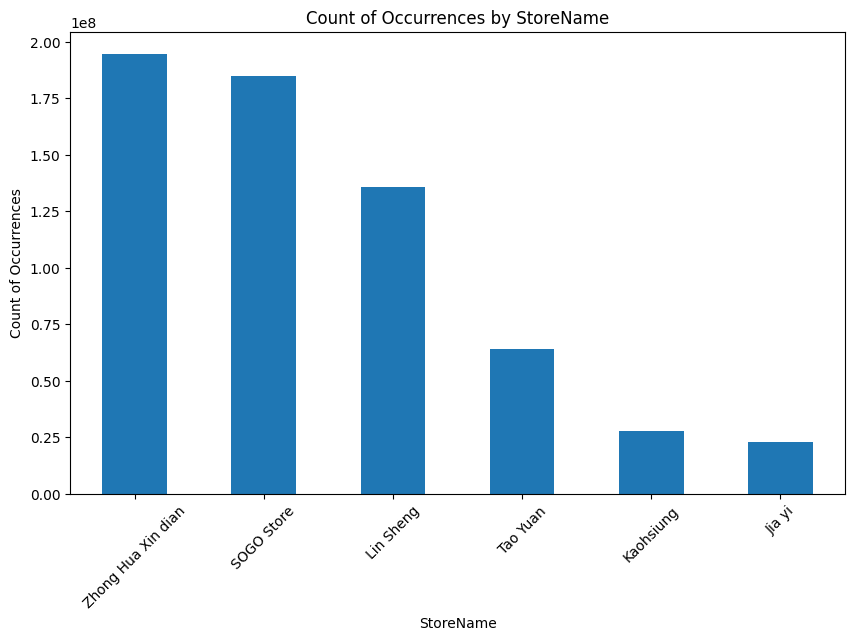

In [55]:
df = pd.read_feather('./Customerbehavior_Final.feather')

# Drop duplicate 
df.drop_duplicates(subset='UniqueID', keep='first', inplace=True)

# Counting occurrences of each StoreName
sum_per_store = df.groupby('StoreName')['BoxSpending'].sum().sort_values(ascending=False)

# Generating the bar chart
plt.figure(figsize=(10,6))
sum_per_store.plot(kind='bar')
plt.title('Count of Occurrences by StoreName')
plt.xlabel('StoreName')
plt.ylabel('Count of Occurrences')
plt.xticks(rotation=45)
plt.show()  

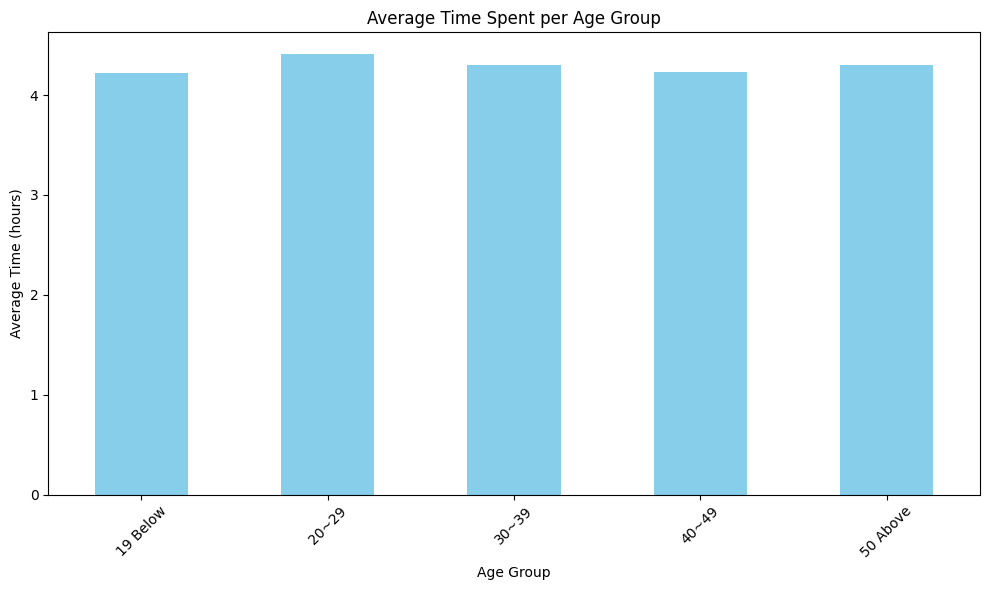

In [56]:
df = pd.read_feather('./Customerbehavior_Final.feather')

# Drop duplicates based on 'UniqueID'
df.drop_duplicates(subset='UniqueID', keep='first', inplace=True)

# Calculate the total duration for each transaction
df['TotalDuration'] = df['Duration(hours)'] * df['CustomerNumber']

# Group by 'Age' and calculate the weighted mean of durations
age_duration = df.groupby('Age').apply(lambda x: x['TotalDuration'].sum() / x['CustomerNumber'].sum())

plt.figure(figsize=(10, 6))
age_duration.plot(kind='bar', color='skyblue')
plt.title('Average Time Spent per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Time (hours)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the bar chart
plt.show()

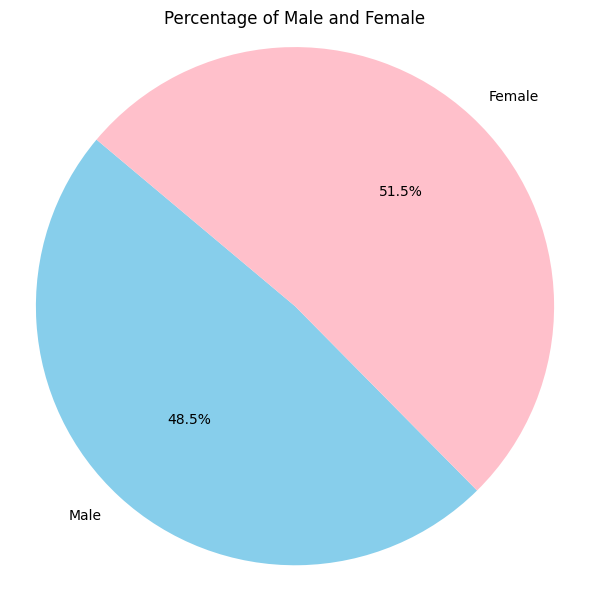

In [57]:
df = pd.read_feather('./Customerbehavior_Final.feather')

df = df.drop_duplicates(subset="UniqueID", keep="first")

# Calculate the total amount of male and female
total_male_amount = df['MaleNumber'].sum()
total_female_amount = df['FemaleNumber'].sum()


# Calculate percentages
total_amount = total_male_amount + total_female_amount
male_percentage = (total_male_amount / total_amount) * 100
female_percentage = (total_female_amount / total_amount) * 100

# Data for the pie chart
percentages = [male_percentage, female_percentage]
labels = ['Male', 'Female']
colors = ['skyblue', 'pink']

# Create a pie chart to represent the percentages of male and female
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Male and Female')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Display the pie chart
plt.show()

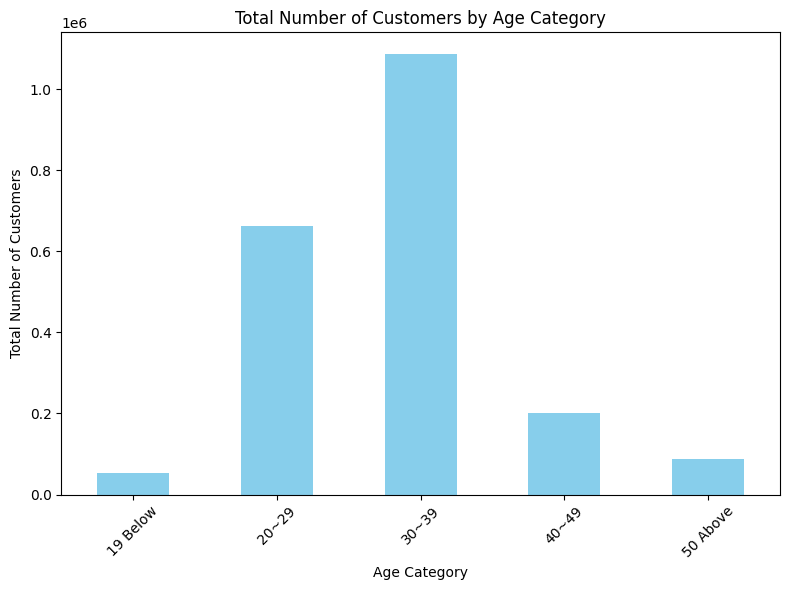

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_feather('./Customerbehavior_Final.feather')


# Drop duplicates based on 'UniqueID'
df.drop_duplicates(subset='UniqueID', keep='first', inplace=True)


customer_count_by_age = df.groupby('Age')['CustomerNumber'].sum()

plt.figure(figsize=(8, 6))
customer_count_by_age.plot(kind='bar', color='skyblue')
plt.title('Total Number of Customers by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<Figure size 1000x600 with 0 Axes>

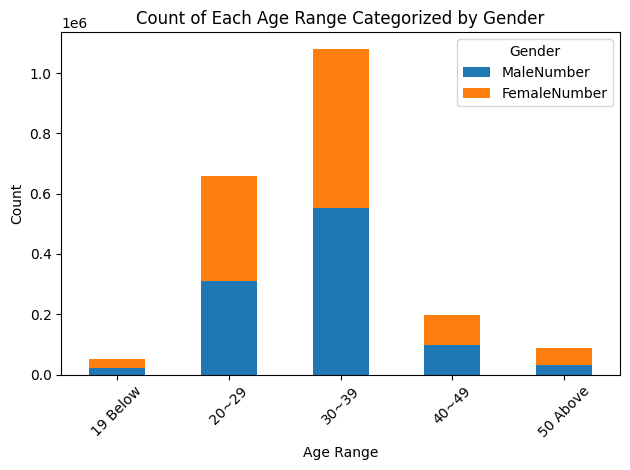

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_feather('./Customerbehavior_Final.feather')


# Drop duplicates based on 'UniqueID'
df.drop_duplicates(subset='UniqueID', keep='first', inplace=True)

# Grouping the data by age range and summing the MaleNumber and FemaleNumber
age_gender_counts = df.groupby('Age')[['MaleNumber', 'FemaleNumber']].sum()

# Plotting a grouped bar chart to represent the count of each age range categorized by gender
plt.figure(figsize=(10, 6))
age_gender_counts.plot(kind='bar', stacked=True)
plt.title('Count of Each Age Range Categorized by Gender')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

# Display the grouped bar chart
plt.show()


# IA


## Duration

In [60]:
# Reset the dataframe
df = pd.read_feather('./Customerbehavior_Final.feather')

# Drop duplicate 
df.drop_duplicates(subset='UniqueID', keep='first', inplace=True)

df.drop(["Duration(hours)", "UniqueID", "MealType", "MealSpending", "OrderTime", "BillCode", "BoxSpending"], axis=1, inplace=True)

df["EnterTime"] = df['EnterTime'].dt.hour * 60 + df['EnterTime'].dt.minute
df["LeaveTime"] = df['LeaveTime'].dt.hour * 60 + df['LeaveTime'].dt.minute

column_box = ['BoxSize_' + x for x in df["BoxSize"].unique()]
column_age = ['Age_' + x for x in df["Age"].unique()]
column_store = ['StoreName_' + x for x in df["StoreName"].unique()]

df = pd.get_dummies(df, columns=['BoxSize', "Age", 'StoreName'])

In [61]:
y_name = "LeaveTime"

X = df.drop(y_name, axis=1)
y = df[y_name]

train_size_analyse = 0.15
train_size_final = 0.8
X_train, X_val, y_train, y_val = train_test_split(X, y,train_size=train_size_analyse, test_size=0.1, random_state=random_state)

In [62]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=random_state, n_jobs=-1)  

model.fit(X_train, y_train)

joblib.dump(model, f'random_forest_model_duration_v1.joblib')

['random_forest_model_duration_v1.joblib']

In [63]:
# Import necessary metrics from scikit-learn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# y_pred is the prediction of your model on the validation dataset
y_pred = model.predict(X_val)

# Calculate regression metrics
mse = mean_squared_error(y_val, y_pred)  # Calculate Mean Squared Error
mae = mean_absolute_error(y_val, y_pred) # Calculate Mean Absolute Error
r2 = r2_score(y_val, y_pred)             # Calculate R-squared score

# Print the metrics
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Print additional model and training information
print(f"Random state: {random_state}")    # Print the random state used for reproducibility
print(f"Train size: {X_train.shape}")     # Print the size of the training set
print(f"X: {X_train.columns}")            # Print the names of the features
print(f"y: {y_name}")                     # Print the name of the target variable

# Feature importance calculation and display
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]   # Sort feature importances in descending order

# Print the importance of each feature
for f in range(X.shape[1]):
    print(f"{X.columns[indices[f]]}: {importances[indices[f]]}")


MSE: 85134.28876167793
MAE: 144.8815793216909
R²: 0.6627123023276995
Random state: 1117
Train size: (55647, 27)
X: Index(['EnterTime', 'CustomerNumber', 'MaleNumber', 'FemaleNumber',
       'Membership', 'BoxSize_Big box', 'BoxSize_Large box',
       'BoxSize_Large box (no toilet)', 'BoxSize_Medium box',
       'BoxSize_PARTY big box', 'BoxSize_PARTY big box ',
       'BoxSize_PARTY in the big box', 'BoxSize_PARTY medium the box',
       'BoxSize_PARTY small box', 'BoxSize_Presidential package',
       'BoxSize_Small box', 'Age_19 Below', 'Age_20~29', 'Age_30~39',
       'Age_40~49', 'Age_50 Above', 'StoreName_Jia yi', 'StoreName_Kaohsiung',
       'StoreName_Lin Sheng', 'StoreName_SOGO Store', 'StoreName_Tao Yuan',
       'StoreName_Zhong Hua Xin dian'],
      dtype='object')
y: LeaveTime
EnterTime: 0.7695175292842484
CustomerNumber: 0.051541071686660785
FemaleNumber: 0.032309477262974756
MaleNumber: 0.03203637578669294
Membership: 0.013937394082063775
StoreName_Lin Sheng: 0.012901622

In [64]:
importance_min = 0.01

# Get the names of the top N features
features_importantes = [X.columns[i] for i in range(len(importances)) if importances[i] > importance_min]

print(features_importantes)

['EnterTime', 'CustomerNumber', 'MaleNumber', 'FemaleNumber', 'Membership', 'StoreName_Lin Sheng']


In [65]:
X = X[features_importantes]
X_train, X_val, y_train, y_val = train_test_split(X, y,train_size=train_size_final, test_size=0.1, random_state=random_state)

In [66]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=random_state, n_jobs=-1)  

model.fit(X_train, y_train)

joblib.dump(model, 'random_forest_model_duration_v2.joblib')

['random_forest_model_duration_v2.joblib']

In [67]:
# Import necessary metrics from scikit-learn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# y_pred is the prediction of your model on the validation dataset
y_pred = model.predict(X_val)

# Calculate regression metrics
mse = mean_squared_error(y_val, y_pred)  # Calculate Mean Squared Error
mae = mean_absolute_error(y_val, y_pred) # Calculate Mean Absolute Error
r2 = r2_score(y_val, y_pred)             # Calculate R-squared score

# Print the metrics
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Print additional model and training information
print(f"Random state: {random_state}")    # Print the random state used for reproducibility
print(f"Train size: {X_train.shape}")     # Print the size of the training set
print(f"X: {X_train.columns}")            # Print the names of the features
print(f"y: {y_name}")                     # Print the name of the target variable

# Feature importance calculation and display
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]   # Sort feature importances in descending order

# Print the importance of each feature
for f in range(X.shape[1]):
    print(f"{X.columns[indices[f]]}: {importances[indices[f]]}")


MSE: 94213.67567785141
MAE: 149.96950845093156
R²: 0.6267413022315473
Random state: 1117
Train size: (296787, 6)
X: Index(['EnterTime', 'CustomerNumber', 'MaleNumber', 'FemaleNumber',
       'Membership', 'StoreName_Lin Sheng'],
      dtype='object')
y: LeaveTime
EnterTime: 0.8613446819383009
CustomerNumber: 0.04947355454161852
FemaleNumber: 0.032040382850634125
MaleNumber: 0.031038503331250196
StoreName_Lin Sheng: 0.014695485814038352
Membership: 0.011407391524157862


## Membership

In [68]:
# Reset the dataframe
df = pd.read_feather('./Customerbehavior_Final.feather')

# Drop duplicate 
df.drop_duplicates(subset='UniqueID', keep='first', inplace=True)

df.drop(["UniqueID", "MealType", "MealSpending", "OrderTime", "BillCode", "CustomerNumber"], axis=1, inplace=True)

df["EnterTime"] = df['EnterTime'].dt.hour * 60 + df['EnterTime'].dt.minute
df["LeaveTime"] = df['LeaveTime'].dt.hour * 60 + df['LeaveTime'].dt.minute

column_box = ['BoxSize_' + x for x in df["BoxSize"].unique()]
column_age = ['Age_' + x for x in df["Age"].unique()]
column_store = ['StoreName_' + x for x in df["StoreName"].unique()]

df = pd.get_dummies(df, columns=['BoxSize', "Age", 'StoreName'])

In [69]:
y_name = "Membership"

X = df.drop(y_name, axis=1)
y = df[y_name]

train_size_analyse = 0.2
train_size_final = 0.9
X_train, X_val, y_train, y_val = train_test_split(X, y,train_size=train_size_analyse, test_size=0.1, random_state=random_state)

In [70]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=random_state, n_jobs=-1)  

model.fit(X_train, y_train)

joblib.dump(model, 'random_forest_model_membership_v1.joblib')

['random_forest_model_membership_v1.joblib']

In [71]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

y_pred = model.predict(X_val)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

# Print additional model and training information
print(f"Random state: {random_state}")              # Print the random state used for reproducibility
print(f"Train size: {X_train.shape}")               # Print the size of the training dataset
print(f"X: {X_train.columns}")                      # Print the names of the features
print(f"y: {y_name}")                               # Print the name of the target variable

# Feature importance calculation and display
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]             # Sort feature importances in descending order

# Print the importance of each feature
for f in range(X.shape[1]): 
    print(f"{X.columns[indices[f]]} : {importances[indices[f]]}")


Accuracy: 0.7913420846923097
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84     23192
           1       0.78      0.61      0.69     13907

    accuracy                           0.79     37099
   macro avg       0.79      0.76      0.77     37099
weighted avg       0.79      0.79      0.78     37099

Random state: 1117
Train size: (74196, 28)
X: Index(['EnterTime', 'LeaveTime', 'BoxSpending', 'MaleNumber', 'FemaleNumber',
       'Duration(hours)', 'BoxSize_Big box', 'BoxSize_Large box',
       'BoxSize_Large box (no toilet)', 'BoxSize_Medium box',
       'BoxSize_PARTY big box', 'BoxSize_PARTY big box ',
       'BoxSize_PARTY in the big box', 'BoxSize_PARTY medium the box',
       'BoxSize_PARTY small box', 'BoxSize_Presidential package',
       'BoxSize_Small box', 'Age_19 Below', 'Age_20~29', 'Age_30~39',
       'Age_40~49', 'Age_50 Above', 'StoreName_Jia yi', 'StoreName_Kaohsiung',
       'StoreName_Lin She

In [72]:
importance_min = 0.05

# Get the names of the top N features
features_importantes = [X.columns[i] for i in range(len(importances)) if importances[i] > importance_min]

print(features_importantes)

['EnterTime', 'LeaveTime', 'BoxSpending', 'MaleNumber', 'FemaleNumber', 'Duration(hours)']


In [73]:
X = df[features_importantes]
y = df[y_name]

X_train, X_val, y_train, y_val = train_test_split(X, y,train_size=train_size_final, test_size=0.1, random_state=random_state)

In [74]:
model = RandomForestClassifier(random_state=random_state, n_jobs=-1)  

model.fit(X_train, y_train)

joblib.dump(model, 'random_forest_model_membership_v2.joblib')

['random_forest_model_membership_v2.joblib']

In [75]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

y_pred = model.predict(X_val)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

# Print the accuracy and classification report
print(f"Accuracy : {accuracy}")
print("Classification Report :")
print(class_report)

# Print additional model and training information
print(f"Random state: {random_state}")              # Print the random state used for reproducibility
print(f"Train size: {X_train.shape}")               # Print the size of the training dataset
print(f"X: {X_train.columns}")                      # Print the names of the features
print(f"y: {y_name}")                               # Print the name of the target variable

# Feature importance calculation and display
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]             # Sort feature importances in descending order

# Print the importance of each feature
for f in range(X.shape[1]):
    print(f"{X.columns[indices[f]]}: {importances[indices[f]]}")

Accuracy : 0.8325022237796167
Classification Report :
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     23192
           1       0.82      0.70      0.76     13907

    accuracy                           0.83     37099
   macro avg       0.83      0.81      0.82     37099
weighted avg       0.83      0.83      0.83     37099

Random state: 1117
Train size: (333885, 6)
X: Index(['EnterTime', 'LeaveTime', 'BoxSpending', 'MaleNumber', 'FemaleNumber',
       'Duration(hours)'],
      dtype='object')
y: Membership
BoxSpending: 0.4520655777447792
LeaveTime: 0.15410858899403143
EnterTime: 0.15042986246830872
Duration(hours): 0.1280352533506088
MaleNumber: 0.059646093804773384
FemaleNumber: 0.05571462363749856


In [76]:
X = df[features_importantes].drop("Duration(hours)" , axis=1)

y = df[y_name]

X_train, X_val, y_train, y_val = train_test_split(X, y,train_size=train_size_final, test_size=0.1, random_state=random_state)

In [77]:
model = RandomForestClassifier(random_state=random_state, n_jobs=-1)  

model.fit(X_train, y_train)

joblib.dump(model, 'random_forest_model_membership_v3.joblib')

['random_forest_model_membership_v3.joblib']

In [78]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

y_pred = model.predict(X_val)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

# Print additional model and training information
print(f"Random state: {random_state}")              # Print the random state used for reproducibility
print(f"Train size: {X_train.shape}")               # Print the size of the training dataset
print(f"X: {X_train.columns}")                      # Print the names of the features
print(f"y: {y_name}")                               # Print the name of the target variable

# Feature importance calculation and display
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]             # Sort feature importances in descending order

# Print the importance of each feature
for f in range(X.shape[1]):
    print(f"{X.columns[indices[f]]} : {importances[indices[f]]}")

Accuracy: 0.8329874120596242
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     23192
           1       0.82      0.71      0.76     13907

    accuracy                           0.83     37099
   macro avg       0.83      0.81      0.82     37099
weighted avg       0.83      0.83      0.83     37099

Random state: 1117
Train size: (333885, 5)
X: Index(['EnterTime', 'LeaveTime', 'BoxSpending', 'MaleNumber', 'FemaleNumber'], dtype='object')
y: Membership
BoxSpending : 0.4980578681142921
EnterTime : 0.19705031022309827
LeaveTime : 0.1953936163707263
MaleNumber : 0.055499794201480934
FemaleNumber : 0.053998411090402515
